### Importando librerias y datasets para analizar

utilizaremos pandas para leer el csv de nuestra encuentas y comenzar con la limpieza ya analisis descriptivo de esta misma

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import chi2_contingency

In [4]:
survey = pd.read_csv('survey.csv', delimiter=',' )
variables = pd.read_csv('variables.csv' , delimiter=';' )
equivalentes_plan_tool = pd.read_csv('traducciones_herramientas_planificacion.csv' , delimiter=',' )
equivalentes_bad_exps = pd.read_csv('traducciones_malas_experiencias.csv' , delimiter=',')

In [5]:
equivalentes_plan_tool = equivalentes_plan_tool.loc[: ,['col','equivalente']]

In [6]:
equivalentes_plan_tool

,col,equivalente
0,Notas/Apuntes/Calendarios/Libretas,Notas/Apuntes/Calendarios/Libretas
1,Google Calendar,Notas/Apuntes/Calendarios/Libretas
2,Ninguno,Ninguno
3,Trello,Trello
4,Notion,Notion
5,Microsoft OneNote,Microsoft OneNote
6,Jira,Jira
7,Microsoft To Do,Microsoft To Do
8,Google Keep,Google Keep
9,lapiz y papel,Notas/Apuntes/Calendarios/Libretas


In [7]:
survey = survey.iloc[ : , 1:46 ].copy()

In [8]:
survey.columns = variables.loc[ : , 'Variable' ]

In [9]:
survey

Variable,edad,genero,trabajo,foráneo,familiares_unah,familiares_is,familiares_graduados,influencia,is_segunda_opcion,carrera_simultanea,...,interés_rama_carrera_ad,interés_rama_carrera_analis,interés_rama_carrera_ark,interés_rama_carrera_bd,interés_rama_carrera_prog,interés_rama_carrera_red,introvertido,comunicación,competitividad,liderazgo
0,24,Hombre,Sí,No,No,Sí,Sí,No,Sí,No,...,3.0,3.0,2.0,4.0,1.0,5.0,No,Sí,Sí,No
1,25,Hombre,Sí,No,Sí,No,Sí,No,Sí,Sí,...,2.0,2.0,2.0,3.0,5.0,2.0,No,No,Sí,Sí
2,21,Hombre,Sí,No,Sí,No,Sí,No,Sí,No,...,4.0,4.0,4.0,5.0,4.0,5.0,No,Sí,Sí,Sí
3,22,Hombre,No,Sí,Sí,No,Sí,No,Sí,No,...,3.0,2.0,1.0,2.0,3.0,3.0,Sí,Sí,Sí,Sí
4,21,Mujer,No,Sí,Sí,No,Sí,Sí,Sí,No,...,3.0,3.0,4.0,5.0,4.0,4.0,Sí,No,No,Sí
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,27,Hombre,No,No,No,No,No,No,Sí,No,...,4.0,4.0,4.0,5.0,5.0,4.0,Sí,Sí,Sí,Sí
226,24,Mujer,Sí,No,Sí,No,Sí,No,Sí,No,...,4.0,5.0,5.0,5.0,5.0,5.0,Sí,Sí,No,Sí
227,24,Hombre,No,No,Sí,No,Sí,No,Sí,No,...,4.0,4.0,4.0,3.0,3.0,4.0,Sí,No,Sí,Sí
228,20,Hombre,Sí,No,Sí,No,No,Sí,Sí,No,...,NaN,NaN,NaN,NaN,NaN,NaN,No,Sí,No,Sí


In [10]:
Analysis_null_values = pd.DataFrame()
for c_ in survey.columns:
    r_ = pd.DataFrame({
        "columna": [c_]
        , "frequencial": np.sum( pd.isnull( survey.loc[ : , c_ ] ) )
        , "porcentaje":  np.sum( pd.isnull( survey.loc[ : , c_] ) ) / survey.shape[0]
    })
    Analysis_null_values = pd.concat([ Analysis_null_values , r_ ])    

In [11]:
Analysis_null_values.loc[ Analysis_null_values['porcentaje'] >= 0.001 , :  ]

,columna,frequencial,porcentaje
0,herramientas_planificacion,35,0.152174
0,malas_experiencias,10,0.043478
0,interés_rama_carrera_fis,1,0.004348
0,interés_rama_carrera_el,3,0.013043
0,interés_rama_carrera_ad,3,0.013043
0,interés_rama_carrera_analis,2,0.008696
0,interés_rama_carrera_ark,2,0.008696
0,interés_rama_carrera_bd,3,0.013043
0,interés_rama_carrera_prog,1,0.004348
0,interés_rama_carrera_red,2,0.008696


In [512]:
surveySinNaNs = survey.loc[  
    ~( pd.isnull( survey["interés_rama_carrera_el"] )
    | pd.isnull( survey["interés_rama_carrera_fis"] )
    | pd.isnull( survey["interés_rama_carrera_ad"] )
    | pd.isnull( survey["interés_rama_carrera_analis"] )
    | pd.isnull( survey["interés_rama_carrera_ark"] )
    | pd.isnull( survey["interés_rama_carrera_bd"] )
    | pd.isnull( survey["interés_rama_carrera_prog"] )
    | pd.isnull( survey["interés_rama_carrera_red"] ) )
    ,  
].copy()

In [513]:
surveySinNaNs

Variable,edad,genero,trabajo,foráneo,familiares_unah,familiares_is,familiares_graduados,influencia,is_segunda_opcion,carrera_simultanea,...,interés_rama_carrera_ad,interés_rama_carrera_analis,interés_rama_carrera_ark,interés_rama_carrera_bd,interés_rama_carrera_prog,interés_rama_carrera_red,introvertido,comunicación,competitividad,liderazgo
0,24,Hombre,Sí,No,No,Sí,Sí,No,Sí,No,...,3.0,3.0,2.0,4.0,1.0,5.0,No,Sí,Sí,No
1,25,Hombre,Sí,No,Sí,No,Sí,No,Sí,Sí,...,2.0,2.0,2.0,3.0,5.0,2.0,No,No,Sí,Sí
2,21,Hombre,Sí,No,Sí,No,Sí,No,Sí,No,...,4.0,4.0,4.0,5.0,4.0,5.0,No,Sí,Sí,Sí
3,22,Hombre,No,Sí,Sí,No,Sí,No,Sí,No,...,3.0,2.0,1.0,2.0,3.0,3.0,Sí,Sí,Sí,Sí
4,21,Mujer,No,Sí,Sí,No,Sí,Sí,Sí,No,...,3.0,3.0,4.0,5.0,4.0,4.0,Sí,No,No,Sí
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,24,Mujer,No,No,Sí,No,No,No,No,No,...,3.0,4.0,5.0,4.0,2.0,5.0,No,Sí,Sí,Sí
225,27,Hombre,No,No,No,No,No,No,Sí,No,...,4.0,4.0,4.0,5.0,5.0,4.0,Sí,Sí,Sí,Sí
226,24,Mujer,Sí,No,Sí,No,Sí,No,Sí,No,...,4.0,5.0,5.0,5.0,5.0,5.0,Sí,Sí,No,Sí
227,24,Hombre,No,No,Sí,No,Sí,No,Sí,No,...,4.0,4.0,4.0,3.0,3.0,4.0,Sí,No,Sí,Sí


In [14]:
5 / survey.shape[0]

0.021739130434782608

In [15]:
survey.shape[0] - 5

225

Ejemplo de como calcular medianas para ser remplazadas

In [12]:
survey.loc[ pd.isnull( survey["interés_rama_carrera_el"] ) , "interés_rama_carrera_el" ] = np.nanmedian( survey["interés_rama_carrera_el"] )

In [13]:
cc_ = Analysis_null_values.loc[ 
    (Analysis_null_values['porcentaje'] >= 0.001) 
    & (Analysis_null_values['porcentaje'] < 0.04 )
    , "columna"  
]

In [14]:
for c in cc_:
    survey.loc[ pd.isnull( survey[c] ) , c ] = np.nanmedian( survey[c] )

In [15]:
survey.loc[ pd.isnull( survey["malas_experiencias"] ) , "malas_experiencias" ] = "No malas experiencias"
survey.loc[ pd.isnull( survey["herramientas_planificacion"] ) , "herramientas_planificacion" ] = "Ninguno"

In [16]:
survey.loc[ : , "herramientas_planificacion" ].drop_duplicates()

0                     Notas/Apuntes/Calendarios/Libretas
1                                        Google Calendar
2      Notion, Microsoft OneNote, Google Calendar, No...
8      Google Calendar, Notas/Apuntes/Calendarios/Lib...
10                                       Microsoft To Do
13                                                Trello
15     Google Calendar, Notas/Apuntes/Calendarios/Lib...
16                                               Ninguno
17                                                 excel
19                                                  Jira
22                                     Microsoft OneNote
25                                          Jira, Trello
26     Microsoft OneNote, Notas/Apuntes/Calendarios/L...
29     Jira, Microsoft OneNote, Google Calendar, Nota...
31     Trello, Notion, Google Calendar, Notas/Apuntes...
32                       Trello, Notion, Google Calendar
34                                                 Excel
36     Microsoft OneNote, Googl

In [17]:
def get_popularidad_seleccion_multiple(df, col, sep=','):
    summary = pd.DataFrame()
    for index, row in df.iterrows():    
        s = pd.DataFrame({
            col: row[col].split(sep)
        })
        s[col] =  s.apply( lambda r: r[col].strip() , axis = 1 )
        s['n'] = 1
        summary = pd.concat( [ summary , s ] )    
    summary = summary.groupby( [col] , as_index = False ).agg( { 'n' : ['sum'] } )
    summary.columns = summary.columns.droplevel(1)
    return summary.sort_values('n', ascending=False)

In [18]:
summary = get_popularidad_seleccion_multiple( survey , "herramientas_planificacion" )

In [19]:
summary = summary.merge( equivalentes_plan_tool , right_on="col" , left_on="herramientas_planificacion" , how='inner' )

In [20]:
summary = summary.loc[ : , ['equivalente','n'] ]

In [21]:
summary = summary.groupby( ["equivalente"] , as_index=False  ).sum()

In [22]:
summary = summary.sort_values( ['n'] , ascending=False )

In [23]:
summary['percentage'] =  summary.apply( lambda r: r['n'] / np.sum(summary['n']) , axis = 1 ) 

In [24]:
summary

,equivalente,n,percentage
6,Notas/Apuntes/Calendarios/Libretas,212,0.627219
5,Ninguno,38,0.112426
9,Trello,34,0.100592
7,Notion,20,0.059172
3,Microsoft OneNote,19,0.056213
2,Jira,5,0.014793
8,Otros,4,0.011834
0,Excel,2,0.005917
1,Google Keep,2,0.005917
4,Microsoft To Do,2,0.005917


<BarContainer object of 10 artists>

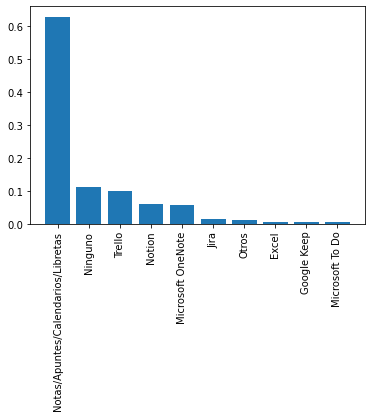

In [25]:
plt.xticks( rotation = 90 )
plt.bar( summary['equivalente'] , summary['percentage'] )

## Malas experiencias

In [26]:
summary = get_popularidad_seleccion_multiple( survey , "malas_experiencias" )

In [27]:
summary = summary.merge( equivalentes_bad_exps , right_on="col" , left_on="malas_experiencias" , how='inner' )

In [28]:
summary = summary.loc[ : , ['equivalente','n_x'] ]

In [29]:
summary = summary.groupby( ["equivalente"] , as_index=False  ).sum()

In [30]:
summary = summary.sort_values( ['n_x'] , ascending=False )

In [31]:
summary['percentage'] =  summary.apply( lambda r: r['n_x'] / np.sum(summary['n_x']) , axis = 1 ) 

In [32]:
summary

,equivalente,n_x,percentage
8,Sistema de registro,164,0.314779
2,Docentes,129,0.247601
0,Campus Virtual,97,0.186180
1,Con Compañeros,49,0.094050
3,Instalaciones Físicas,43,0.082534
4,Integridad Personal,19,0.036468
5,No malas experiencias,14,0.026871
7,Salud mental,4,0.007678
6,Problemas de Transporte,2,0.003839


<BarContainer object of 9 artists>

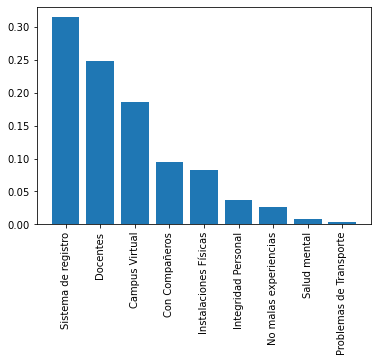

In [33]:
plt.xticks( rotation = 90 )
plt.bar( summary['equivalente'] , summary['percentage'] )

In [34]:
survey["herramientas_planificacion"]

0                     Notas/Apuntes/Calendarios/Libretas
1                                        Google Calendar
2      Notion, Microsoft OneNote, Google Calendar, No...
3                     Notas/Apuntes/Calendarios/Libretas
4                     Notas/Apuntes/Calendarios/Libretas
                             ...                        
225                                Trello, Notion, Asana
226                                              Ninguno
227                   Notas/Apuntes/Calendarios/Libretas
228                                              Ninguno
229                                               Trello
Name: herramientas_planificacion, Length: 230, dtype: object

### Tratamiento de Herramientas planificacion

In [35]:
survey["herramientas_planificacion_clean"] = ""

In [36]:
equivalentes_plan_tool.loc[ equivalentes_plan_tool['equivalente'] == "Notas/Apuntes/Calendarios/Libretas" , :  ]

,col,equivalente
0,Notas/Apuntes/Calendarios/Libretas,Notas/Apuntes/Calendarios/Libretas
1,Google Calendar,Notas/Apuntes/Calendarios/Libretas
9,lapiz y papel,Notas/Apuntes/Calendarios/Libretas
11,Recordatorios,Notas/Apuntes/Calendarios/Libretas
15,Calendario interactivo,Notas/Apuntes/Calendarios/Libretas
16,Mi agenda en físico,Notas/Apuntes/Calendarios/Libretas


In [37]:
useToReplace = equivalentes_plan_tool.loc[ equivalentes_plan_tool['equivalente'] == "Notas/Apuntes/Calendarios/Libretas" , "col"  ]
for r in useToReplace:
    survey.loc[ survey["herramientas_planificacion"].str.contains(r) , "herramientas_planificacion_clean" ] = "Planificacion tradicional"

In [38]:
equivalentes_plan_tool.loc[ equivalentes_plan_tool['equivalente'] == "Ninguno" , :  ]

,col,equivalente
2,Ninguno,Ninguno
14,No,Ninguno
20,ninguan,Ninguno


In [39]:
useToReplace = equivalentes_plan_tool.loc[ equivalentes_plan_tool['equivalente'] == "Ninguno" , "col"  ]
for r in useToReplace:    
    if r != "No":
        survey.loc[ survey["herramientas_planificacion"].str.contains(r) , "herramientas_planificacion_clean" ] = "No planificacion"
    else:
        survey.loc[ survey["herramientas_planificacion"] == "No" , "herramientas_planificacion_clean" ] = "No planificacion"

In [40]:
equivalentes_plan_tool.loc[ ~equivalentes_plan_tool['equivalente'].isin(["Ninguno","Notas/Apuntes/Calendarios/Libretas"]) , : ]

,col,equivalente
3,Trello,Trello
4,Notion,Notion
5,Microsoft OneNote,Microsoft OneNote
6,Jira,Jira
7,Microsoft To Do,Microsoft To Do
8,Google Keep,Google Keep
10,excel,Excel
12,Otras herramientas de organizacion de internet,Otros
13,Asana,Otros
17,Mentalmente,Otros


In [41]:
useToReplace = equivalentes_plan_tool.loc[ ~equivalentes_plan_tool['equivalente'].isin(["Ninguno","Notas/Apuntes/Calendarios/Libretas"]) , "col"  ]
for r in useToReplace:
    survey.loc[ survey["herramientas_planificacion"].str.contains(r) , "herramientas_planificacion_clean" ] = "Planificacion avanzada"

In [42]:
survey["herramientas_planificacion_clean"].value_counts()

Planificacion tradicional    127
Planificacion avanzada        65
No planificacion              38
Name: herramientas_planificacion_clean, dtype: int64

In [43]:
survey["herramientas_planificacion_clean"].value_counts() / survey.shape[0]

Planificacion tradicional    0.552174
Planificacion avanzada       0.282609
No planificacion             0.165217
Name: herramientas_planificacion_clean, dtype: float64

### Analisis de dependencias

- Ho (nula) = Mide la independencia de dos variables. la desercion y las herramientas de planificacion no depende una de la otra. 
- H1 (alternativa) = las variables de desercion y herramientas de planificacion son dependientes

*( Si el p-value es mayor a 0.05: la opcion a seleccionar es la hipotesis nula )*

In [44]:
survey["desercion"].value_counts()  / survey.shape[0]

Sí    0.504348
No    0.495652
Name: desercion, dtype: float64

In [45]:
survey["herramientas_planificacion_clean"].value_counts()  / survey.shape[0]

Planificacion tradicional    0.552174
Planificacion avanzada       0.282609
No planificacion             0.165217
Name: herramientas_planificacion_clean, dtype: float64

In [46]:
contigency = pd.crosstab( survey["desercion"] , survey["herramientas_planificacion_clean"] )

In [47]:
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='herramientas_planificacion_clean', ylabel='desercion'>

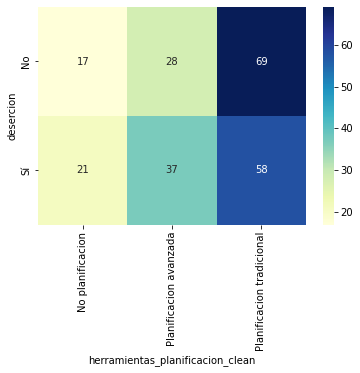

In [48]:
sns.heatmap( contigency , annot = True , cmap="YlGnBu" )

In [49]:
c, p, dof, expected  = chi2_contingency(contigency)

In [50]:
p

0.272154885498537

Por lo tanto no rechazamos la hipotesis nula, las habilidades de planificacion con la eventualidad de querer desertar son independientes

### Clases reprobadas

- Ho (nula) = Mide la independencia de dos variables. la frequencia de reprobacion y las herramientas de planificacion no depende una de la otra. 
- H1 (alternativa) = las variables de reprobacion y herramientas de planificacion son dependientes

*( Si el p-value es mayor a 0.05: la opcion a seleccionar es la hipotesis nula )*

In [51]:
survey["clases_reprobadas"].value_counts()  / survey.shape[0]

1-3                      0.321739
Más de 6                 0.269565
4-6                      0.213043
Ninguna                  0.126087
Prefiero no contestar    0.069565
Name: clases_reprobadas, dtype: float64

In [52]:
contigency = pd.crosstab( survey["herramientas_planificacion_clean"] , survey["clases_reprobadas"] )

In [53]:
contigency

clases_reprobadas,1-3,4-6,Más de 6,Ninguna,Prefiero no contestar
herramientas_planificacion_clean,,,,,
No planificacion,13,8,7,3,7
Planificacion avanzada,19,13,24,9,0
Planificacion tradicional,42,28,31,17,9


<AxesSubplot:xlabel='clases_reprobadas', ylabel='herramientas_planificacion_clean'>

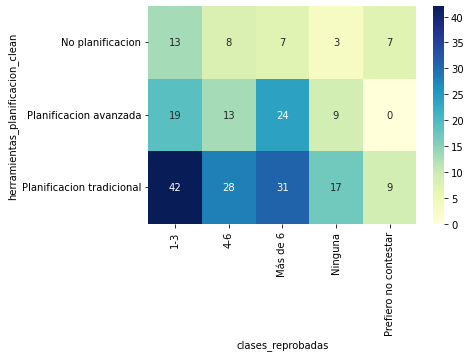

In [54]:
sns.heatmap( contigency , annot = True , cmap="YlGnBu" )

In [55]:
c, p, dof, expected  = chi2_contingency(contigency)

In [56]:
p

0.0347504059059335

In [57]:
survey['edad'].mean()

22.96086956521739

## Edad respecto al uso de herramientas de planificación

### EDAD

- Ho (nula) = Mide la independencia de dos variables. La edad y las herramientas de planificacion no depende una de la otra. 
- H1 (alternativa) = las variables de edad y herramientas de planificacion son dependientes

*( Si el p-value es mayor a 0.05: la opcion a seleccionar es la hipotesis nula )*

In [58]:
survey["edad"].value_counts()  / survey.shape[0]

23    0.165217
24    0.143478
21    0.113043
25    0.095652
18    0.078261
19    0.073913
22    0.069565
20    0.069565
27    0.047826
26    0.043478
28    0.026087
29    0.017391
17    0.017391
32    0.008696
31    0.008696
34    0.008696
30    0.008696
37    0.004348
Name: edad, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x27a0ffe3a30>,
 'caps': [<matplotlib.lines.Line2D at 0x27a0fff1100>,
 'boxes': [<matplotlib.lines.Line2D at 0x27a0ffe35e0>],
 'medians': [<matplotlib.lines.Line2D at 0x27a0fff1820>],
 'fliers': [<matplotlib.lines.Line2D at 0x27a0fff1bb0>],
 'means': []}

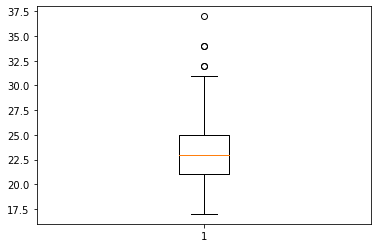

In [59]:
plt.boxplot(survey['edad'])

In [60]:
median = np.median(survey['edad'])

In [61]:
survey.loc[survey['edad'] > 28 , 'edad'] = median

In [62]:
contigency = pd.crosstab( survey["herramientas_planificacion_clean"] , survey["edad"] )

<AxesSubplot:xlabel='edad', ylabel='herramientas_planificacion_clean'>

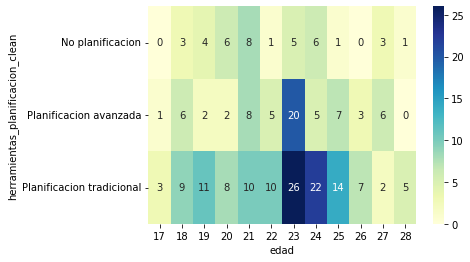

In [63]:
sns.heatmap( contigency , annot = True , cmap="YlGnBu" )

In [64]:
c, p, dof, expected  = chi2_contingency(contigency)

In [65]:
p

0.04022180295367698

- Por lo tanto no rechazamos la hipotesis alternativa, las habilidades de planificacion con la edad son dependientas. y podemos ver que entre más cerca de una supuesta madurez mental académica (en promedio 23 años) se suele tener una mayor preocupación por planificar habilidades

## Clases de matemátias con planes de deserción

### MAtemáticas

- Ho (nula) = Mide la independencia de dos variables. La cantidad de clases matriculadas de matemáticas por periodo y los planes de desercionn no depende una de la otra. 
- H1 (alternativa) = las variables de matemáticas y deserción son dependientes

*( Si el p-value es mayor a 0.05: la opcion a seleccionar es la hipotesis nula )*

In [66]:
contigency = pd.crosstab( survey["desercion"] , survey["clases_mate_periodo"] )

<AxesSubplot:xlabel='clases_mate_periodo', ylabel='desercion'>

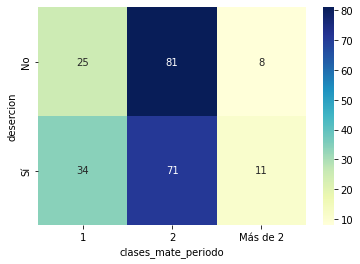

In [67]:
sns.heatmap( contigency , annot = True , cmap="YlGnBu" )

In [68]:
c, p, dof, expected  = chi2_contingency(contigency)

In [69]:
p

0.28833607973807784

- Por lo tanto no rechazamos la hipotesis nula, la cantidad de clases de matemáticas matricualdas por periodo y el deseo de desercion son independientes. 

## Clases reprobadas con planes de deserción

### Reprobadas

- Ho (nula) = Mide la independencia de dos variables. Las clases reprobadas y la desercion no depende una de la otra. 
- H1 (alternativa) = las variables de clases reprobadas y desercion son dependientes

*( Si el p-value es mayor a 0.05: la opcion a seleccionar es la hipotesis nula )*

In [70]:
contigency = pd.crosstab( survey["clases_reprobadas"] , survey["desercion"] )

<AxesSubplot:xlabel='desercion', ylabel='clases_reprobadas'>

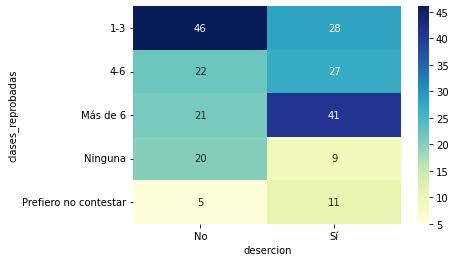

In [71]:
sns.heatmap( contigency , annot = True , cmap="YlGnBu" )

In [72]:
c, p, dof, expected  = chi2_contingency(contigency)

In [73]:
p

0.0013830725519355064

- Por lo tanto no rechazamos la hipotesis alternativa, las cantidad de clases reprobadas con el deseo de deserción son dependientas. Podemos observar que entre más clases reprueban los estudiantes, los deseos por desertar aumentan

## Clases reprobadas con hábitos de planificación

### Reprobadas Hábitos

- Ho (nula) = Mide la independencia de dos variables. Las clases reprobadas y los hábitos de planificación no depende una de la otra. 
- H1 (alternativa) = las variables de clases reprobadas y los hábitos de planificación son dependientes.

*( Si el p-value es mayor a 0.05: la opcion a seleccionar es la hipotesis nula )*

In [74]:
contigency = pd.crosstab( survey["clases_reprobadas"] , survey["herramientas_planificacion_clean"] )

<AxesSubplot:xlabel='herramientas_planificacion_clean', ylabel='clases_reprobadas'>

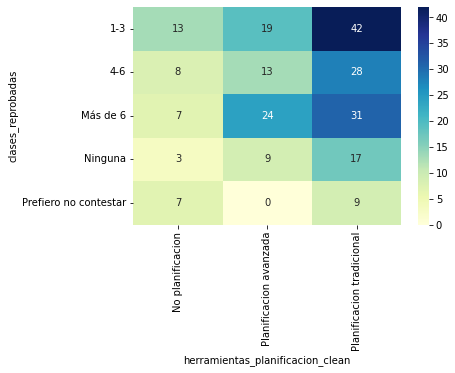

In [75]:
sns.heatmap( contigency , annot = True , cmap="YlGnBu" )

In [76]:
c, p, dof, expected  = chi2_contingency(contigency)

In [77]:
p

0.0347504059059335

- Por lo tanto no rechazamos la hipotesis alternativa, las cantidad de clases reprobadas con el uso de las herramientas de planificación, son dependientes. Las personas que suelen tener hábitos de planificación tienen un índice de repitencia alto, por lo que podemos concluir que no se hace buen uso de ellas.

## El trabajo influye en querer desertar

### Trabajo y estudio

- Ho (nula) = Mide la independencia de dos variables. El estudiante trabaja y el hecho de querer desertar no depende una de la otra. 
- H1 (alternativa) = las variables de trabajo y deserción son dependientes.

*( Si el p-value es mayor a 0.05: la opcion a seleccionar es la hipotesis nula )*

In [78]:
contigency = pd.crosstab( survey["trabajo"] , survey["desercion"] )

<AxesSubplot:xlabel='desercion', ylabel='trabajo'>

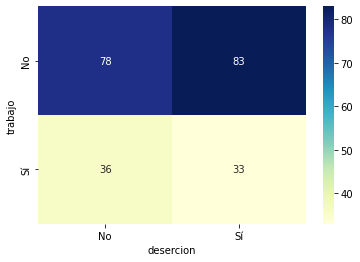

In [79]:
sns.heatmap( contigency , annot = True , cmap="YlGnBu" )

In [80]:
c, p, dof, expected  = chi2_contingency(contigency)

In [81]:
p

0.708311657621659

- Por lo tanto, no rechazamos la hipótesis nula. Las variables analizadas son independientes

## El interés por las autoridades y deserción

### Trabajo y estudio

- Ho (nula) = Mide la independencia de dos variables. El estudiante considera que el entorno universitario se preocupa por su bienestar y comodidad y el hecho de querer desertar no depende una de la otra. 
- H1 (alternativa) = las variables de interés del entorno y deserción son dependientes.

*( Si el p-value es mayor a 0.05: la opcion a seleccionar es la hipotesis nula )*

In [82]:
contigency = pd.crosstab( survey["importante_mi_entorno"] , survey["desercion"] )

<AxesSubplot:xlabel='desercion', ylabel='importante_mi_entorno'>

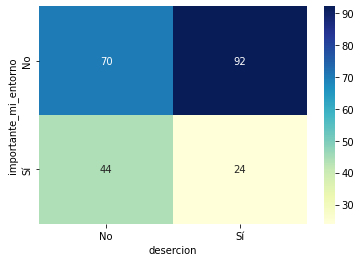

In [83]:
sns.heatmap( contigency , annot = True , cmap="YlGnBu" )

In [84]:
c, p, dof, expected  = chi2_contingency(contigency)

In [85]:
p

0.004641042293816413

- Por lo tanto no rechazamos la hipótesis alternativa, el hecho de que los estudiantes sientan que su entorno no es el adecuando en cuánto al interés que mustran las autoridades competentes con ellos, los lleva a pensar en una posible deserción.

## Excelencia académica con el deseo de estudiar otra carrera

### Excelencia Académica con deseo por estudiar otra carrera

- Ho (nula) = Mide la independencia de dos variables. El estudiante es o ha sido excelencia académica y el deseo por estudiar otra carrera no depende una de la otra. 
- H1 (alternativa) = las variables de excelencia académcia y deseo por estudiar otra carrera son dependientes.

*( Si el p-value es mayor a 0.05: la opcion a seleccionar es la hipotesis nula )*

In [86]:
contigency = pd.crosstab( survey["excelencia_academica"] , survey["is_segunda_opcion"] )

<AxesSubplot:xlabel='is_segunda_opcion', ylabel='excelencia_academica'>

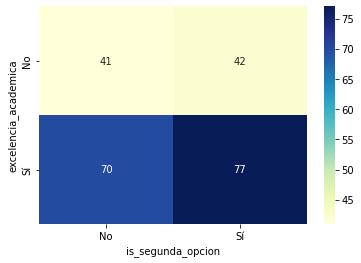

In [87]:
sns.heatmap( contigency , annot = True , cmap="YlGnBu" )

In [88]:
c, p, dof, expected  = chi2_contingency(contigency)

In [89]:
p

0.9030165097295637

- Por lo tanto no rechazamos la hipótesis nula, las variables son independientes y podemos concluir que no hay correlación alguna.

## Encontraremos en qué año de la carrera se encuentran los estudiantes

In [90]:
survey["anio_ingreso_unah"]

0      2016
1      2015
2      2019
3      2016
4      2019
       ... 
225    2018
226    2017
227    2016
228    2020
229    2013
Name: anio_ingreso_unah, Length: 230, dtype: int64

In [91]:
survey["anio_plan_estudios"] =""

In [92]:
survey["anio_plan_estudios"] = 2022 - survey["anio_ingreso_unah"]

In [93]:
survey['anio_plan_estudios'] = survey['anio_plan_estudios'].astype('int64')

In [94]:
survey["anio_plan_estudios"]

0      6
1      7
2      3
3      6
4      3
      ..
225    4
226    5
227    6
228    2
229    9
Name: anio_plan_estudios, Length: 230, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x27a11522520>,
 'caps': [<matplotlib.lines.Line2D at 0x27a11522c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x27a115221f0>],
 'medians': [<matplotlib.lines.Line2D at 0x27a1152e3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27a1152e730>],
 'means': []}

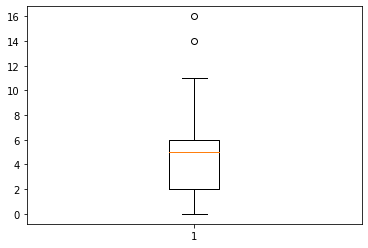

In [95]:
plt.boxplot(survey['anio_plan_estudios'])

In [96]:
survey['anio_plan_estudios'] = survey['anio_plan_estudios'].apply(lambda x: 1 if x ==0 else x)

In [97]:
survey["anio_plan_estudios"].value_counts() / survey.shape[0]

5     0.178261
1     0.169565
6     0.152174
2     0.100000
3     0.091304
4     0.086957
7     0.078261
9     0.056522
8     0.039130
10    0.030435
11    0.008696
16    0.004348
14    0.004348
Name: anio_plan_estudios, dtype: float64

In [98]:
median = np.median(survey['anio_plan_estudios'])

In [99]:
survey.loc[survey['anio_plan_estudios'] > 10, 'anio_plan_estudios'] = median

{'whiskers': [<matplotlib.lines.Line2D at 0x27a11589f10>,
 'caps': [<matplotlib.lines.Line2D at 0x27a115986a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27a11589b80>],
 'medians': [<matplotlib.lines.Line2D at 0x27a11598dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27a115a6190>],
 'means': []}

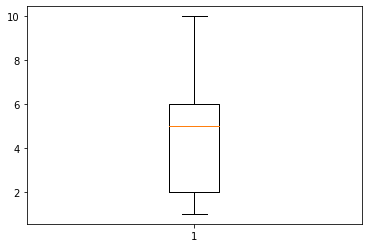

In [100]:
plt.boxplot(survey['anio_plan_estudios'])

## Año de la carrera y desmotivación

### Excelencia Académica con deseo por estudiar otra carrera

- Ho (nula) = Mide la independencia de dos variables. El año en el que se encuentra estudiando el alumno y el deseo por desertar no depende una de la otra. 
- H1 (alternativa) = las variables de año de estudio y deseo por desertar son dependientes.

*( Si el p-value es mayor a 0.05: la opcion a seleccionar es la hipotesis nula )*

In [101]:
contigency = pd.crosstab( survey["anio_plan_estudios"] , survey["desercion"] )

<AxesSubplot:xlabel='desercion', ylabel='anio_plan_estudios'>

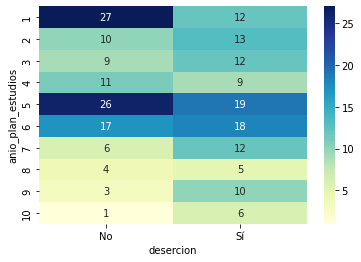

In [102]:
sns.heatmap( contigency , annot = True , cmap="YlGnBu" )

In [103]:
c, p, dof, expected  = chi2_contingency(contigency)

In [104]:
p

0.04361836144081343

In [105]:
contigency = pd.crosstab( survey["edad"] , survey["desercion"] )

<AxesSubplot:xlabel='desercion', ylabel='edad'>

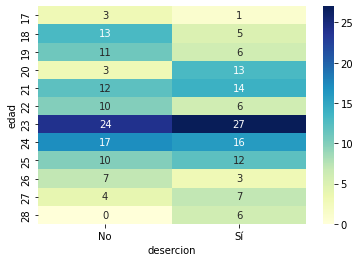

In [106]:
sns.heatmap( contigency , annot = True , cmap="YlGnBu" )

In [624]:
c, p, dof, expected  = chi2_contingency(contigency)

In [625]:
p

0.022715568956398643

In [626]:
contigency = pd.crosstab( survey["edad"] , survey["anio_plan_estudios"] )

<AxesSubplot:xlabel='anio_plan_estudios', ylabel='edad'>

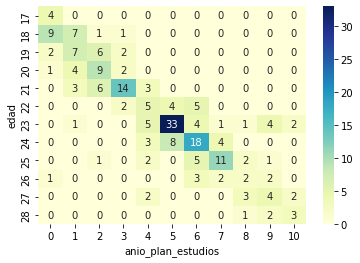

In [627]:
sns.heatmap( contigency , annot = True , cmap="YlGnBu" )

In [628]:
c, p, dof, expected  = chi2_contingency(contigency)

In [629]:
p

7.649101991559024e-74

In [638]:
variable_copy = survey

In [664]:
variable_copy

Variable,interés_rama_carrera_mat,interés_rama_carrera_fis,interés_rama_carrera_el,interés_rama_carrera_ad,interés_rama_carrera_analis,interés_rama_carrera_ark,interés_rama_carrera_bd,interés_rama_carrera_prog,interés_rama_carrera_red
0,5,5.0,3.0,3.0,3.0,2.0,4.0,1.0,5.0
1,5,5.0,3.0,2.0,2.0,2.0,3.0,5.0,2.0
2,1,2.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0
3,2,2.0,3.0,3.0,2.0,1.0,2.0,3.0,3.0
4,5,5.0,4.0,3.0,3.0,4.0,5.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...
225,4,2.0,1.0,4.0,4.0,4.0,5.0,5.0,4.0
226,5,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0
227,3,1.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0
228,1,1.0,3.0,3.0,4.0,4.0,4.0,5.0,4.0


<AxesSubplot:>

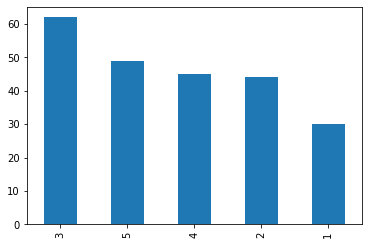

In [668]:
variable_copy['interés_rama_carrera_mat'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

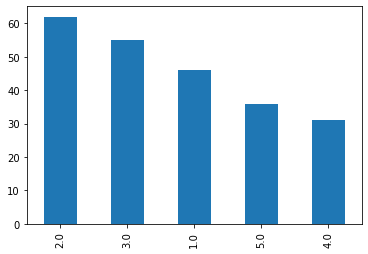

In [669]:
variable_copy['interés_rama_carrera_fis'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

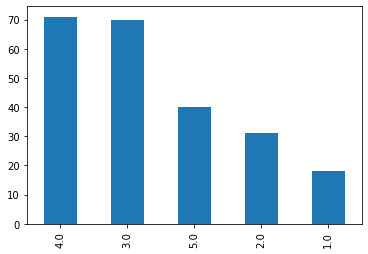

In [670]:
variable_copy['interés_rama_carrera_el'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

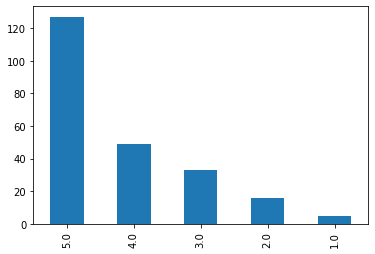

In [696]:
variable_copy['interés_rama_carrera_prog'].value_counts().plot(kind = 'bar')

In [695]:
variable_copy['interés_rama_carrera_prog'].value_counts()

5.0    127
4.0     49
3.0     33
2.0     16
1.0      5
Name: interés_rama_carrera_prog, dtype: int64

In [697]:
variable_copy['interés_rama_carrera_prog'].value_counts() / survey.shape[0]

5.0    0.552174
4.0    0.213043
3.0    0.143478
2.0    0.069565
1.0    0.021739
Name: interés_rama_carrera_prog, dtype: float64

In [676]:
asd['anio_plan_estudios'] = asd['anio_plan_estudios'].apply(lambda x: 1 if x ==0 else x)

In [677]:
asd['anio_plan_estudios'].value_counts()

5       45
1       39
6       35
2       23
3       21
4       20
7       17
9       13
8        9
10       7
2767     1
Name: anio_plan_estudios, dtype: int64

In [698]:
contigency = pd.crosstab( survey["edad"] , survey["herramientas_planificacion_clean"] )

<AxesSubplot:xlabel='herramientas_planificacion_clean', ylabel='edad'>

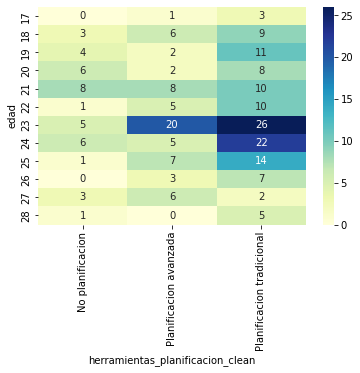

In [699]:
sns.heatmap( contigency , annot = True , cmap="YlGnBu" )

In [700]:
c, p, dof, expected  = chi2_contingency(contigency)

In [701]:
p

0.04022180295367709

In [707]:
contigency = pd.crosstab( survey["clases_reprobadas"] , survey["clases_mate_periodo"] )

<AxesSubplot:xlabel='clases_mate_periodo', ylabel='clases_reprobadas'>

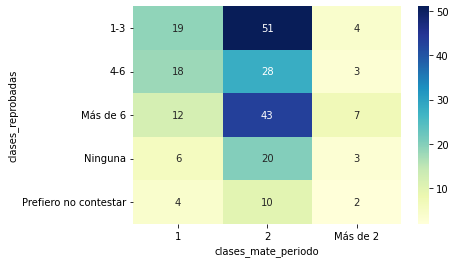

In [708]:
sns.heatmap( contigency , annot = True , cmap="YlGnBu" )

In [709]:
c, p, dof, expected  = chi2_contingency(contigency)

In [710]:
p

0.5773298540322402

In [114]:
temp = survey

In [115]:
temp['des_int'] = ""

In [119]:
temp['des_int'] = temp['desercion'].apply(lambda x: 1 if x == 'Sí' else 0)

In [120]:
temp.columns

Index(['edad', 'genero', 'trabajo', 'foráneo', 'familiares_unah',
       'familiares_is', 'familiares_graduados', 'influencia',
       'is_segunda_opcion', 'carrera_simultanea', 'gusto_por_la_carrera',
       'excelencia_academica', 'superacion', 'satisfaccion',
       'anio_ingreso_unah', 'clases_reprobadas', 'clases_is_periodo',
       'clases_mate_periodo', 'porcentaje_is_clases',
       'planificación_corto_plazo', 'planificación_largo_plazo',
       'herramientas_planificacion', 'importante_mi_entorno',
       'dificultades_economicas_in', 'dificultades_economicas_tra',
       'dificultades_economicas_matr', 'dificultades_economicas_pc',
       'dificultades_economicas_del', 'malas_experiencias', 'desercion',
       'interés_rama_carrera_mat', 'interés_rama_carrera_fis',
       'interés_rama_carrera_el', 'interés_rama_carrera_ad',
       'interés_rama_carrera_analis', 'interés_rama_carrera_ark',
       'interés_rama_carrera_bd', 'interés_rama_carrera_prog',
       'interés_rama_ca

In [121]:
columns_to_use = [ 'dificultades_economicas_in', 'dificultades_economicas_tra',
       'dificultades_economicas_matr', 'dificultades_economicas_pc',
       'dificultades_economicas_del', 'des_int' ]

In [122]:
temp['des_int']

0      1
1      0
2      0
3      0
4      1
      ..
225    1
226    1
227    1
228    1
229    0
Name: des_int, Length: 230, dtype: int64

In [127]:
temp['desercion']

0      Sí
1      No
2      No
3      No
4      Sí
       ..
225    Sí
226    Sí
227    Sí
228    Sí
229    No
Name: desercion, Length: 230, dtype: object

In [123]:
temp.loc[ :, columns_to_use ].corr()

Variable,dificultades_economicas_in,dificultades_economicas_tra,dificultades_economicas_matr,dificultades_economicas_pc,dificultades_economicas_del,des_int
Variable,,,,,,
dificultades_economicas_in,1.000000,0.506266,0.463559,0.416678,0.305915,0.144154
dificultades_economicas_tra,0.506266,1.000000,0.334576,0.330659,0.475954,0.212587
dificultades_economicas_matr,0.463559,0.334576,1.000000,0.468007,0.301648,0.117288
dificultades_economicas_pc,0.416678,0.330659,0.468007,1.000000,0.323073,0.256808
dificultades_economicas_del,0.305915,0.475954,0.301648,0.323073,1.000000,0.165114
des_int,0.144154,0.212587,0.117288,0.256808,0.165114,1.000000


In [124]:
corr_use = survey.loc[ :, columns_to_use ].corr()

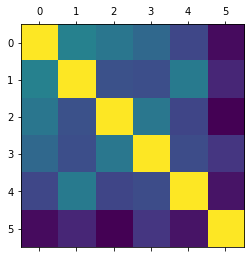

In [125]:
plt.matshow( corr_use )

<AxesSubplot:xlabel='Variable', ylabel='Variable'>

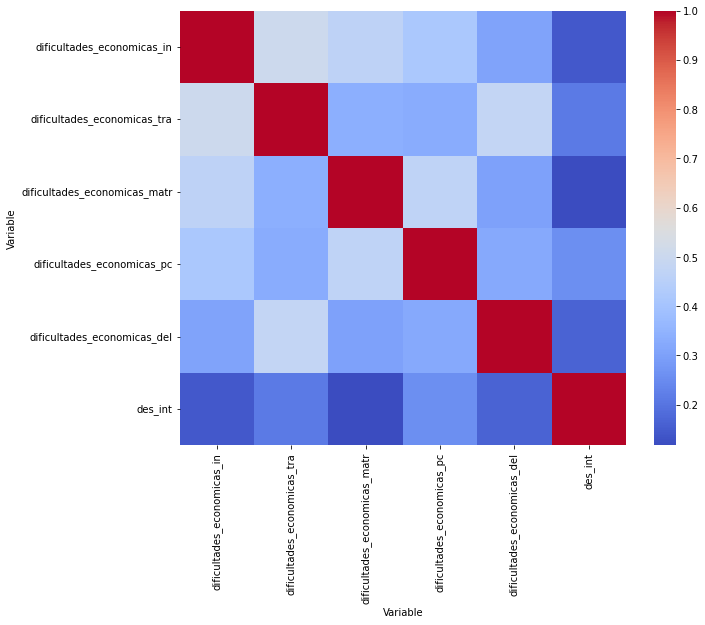

In [126]:
f, ax = plt.subplots( figsize=(10, 8) )

sns.heatmap( corr_use , cmap=sns.color_palette("coolwarm", as_cmap=True))

In [128]:
columns_use = ['interés_rama_carrera_mat', 'interés_rama_carrera_fis',
       'interés_rama_carrera_el', 'interés_rama_carrera_ad',
       'interés_rama_carrera_analis', 'interés_rama_carrera_ark',
       'interés_rama_carrera_bd', 'interés_rama_carrera_prog',
       'interés_rama_carrera_red', 'des_int']

In [129]:
temp.loc[ :, columns_use ].corr()

Variable,interés_rama_carrera_mat,interés_rama_carrera_fis,interés_rama_carrera_el,interés_rama_carrera_ad,interés_rama_carrera_analis,interés_rama_carrera_ark,interés_rama_carrera_bd,interés_rama_carrera_prog,interés_rama_carrera_red,des_int
Variable,,,,,,,,,,
interés_rama_carrera_mat,1.000000,0.632792,0.330121,0.192546,0.052678,0.033588,0.134357,0.152522,0.069773,-0.050676
interés_rama_carrera_fis,0.632792,1.000000,0.336512,0.141599,0.056018,0.079815,0.147983,0.111725,0.132744,0.024249
interés_rama_carrera_el,0.330121,0.336512,1.000000,0.350838,0.255030,0.490610,0.091142,0.045757,0.329448,0.050241
interés_rama_carrera_ad,0.192546,0.141599,0.350838,1.000000,0.363744,0.215946,0.224328,-0.060131,0.272129,0.039822
interés_rama_carrera_analis,0.052678,0.056018,0.255030,0.363744,1.000000,0.456796,0.432659,0.292717,0.360566,-0.136791
interés_rama_carrera_ark,0.033588,0.079815,0.490610,0.215946,0.456796,1.000000,0.253255,0.121366,0.399274,-0.095421
interés_rama_carrera_bd,0.134357,0.147983,0.091142,0.224328,0.432659,0.253255,1.000000,0.337531,0.195048,-0.182872
interés_rama_carrera_prog,0.152522,0.111725,0.045757,-0.060131,0.292717,0.121366,0.337531,1.000000,0.138366,-0.226855
interés_rama_carrera_red,0.069773,0.132744,0.329448,0.272129,0.360566,0.399274,0.195048,0.138366,1.000000,-0.119123


In [131]:
corr_use = survey.loc[ :, columns_use ].corr()

<AxesSubplot:xlabel='Variable', ylabel='Variable'>

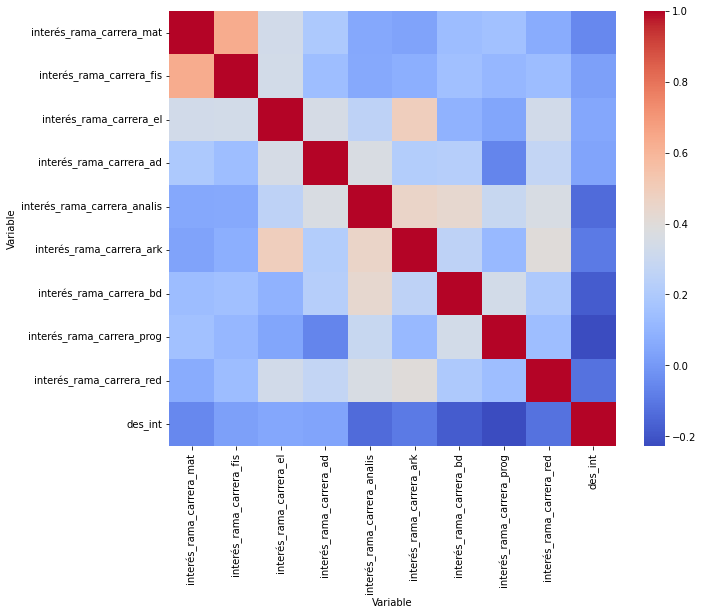

In [132]:
f, ax = plt.subplots( figsize=(10, 8) )

sns.heatmap( corr_use , cmap=sns.color_palette("coolwarm", as_cmap=True))